# CMSC478 Machine Learning - Fall 2020

## Instructor: Fereydoon Vafaei

## <font color="blue">Assignment-4: Multi-Class Classification and Regression with Neural Networks</font>

Bryan Delas Penas GW90572

## Overview and Learning Objectives

In Assignment-4, you're going to perform classification and regression using Neural Networks in Tensorflow and Keras.

Pedagogically, this assignment will help you:
- better understand how neural networks are built and applied on ML tasks - specifically classification and regression.
- pratice NN implementation using Tensorflow 2 and Keras.

**Notice**: While some outputs are provided as reference, other outputs are NOT shared intentionally, and you should not share them or any solution code in Piazza.

**Very Important Note:** You must run all cells and generate all outputs and plots. Notebooks with incomplete outputs will NOT be graded and will get ZERO credit! 

## Part I - Multi-Class Classification Using NN

First download the [data](https://github.com/fereydoonvafaei/CMSC478-Fall2020/blob/master/data/video-games.csv). This is the same video games dataset you used in Assignment-2. You can read the descriptions of the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to do multi-class classification on **Rating**.

## <font color="red"> Required Coding

In [433]:
# Import necessary Python modules as well as Tensorflow and Keras
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")

In [83]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.1.0
Eager Execution mode:  True


> Load the data and do all the required preprocessing steps that you did in Assignment-2 for classification on "Rating".

In [84]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv("video-games.csv")
print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


> Notice that preprocessing in A4, while extremely important to get the correct results moving forward, has no credit on its own because it's the same as A2.

### Preprocessing

In [85]:
# Drop NAs
game_data = game_data.dropna()
print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [86]:
# Drop "Name" column as it does not provide any useful info
game_data = game_data.drop('Name',1)
print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [87]:
# Drop "Global_Sales" column as it is redundant feature - it's just sum of regional and other sales
game_data = game_data.drop('Global_Sales',1)
print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [88]:
# Get feature vector X (all columns but "Rating") and target label y as "Rating"
X = game_data.loc[:,game_data.columns != 'Rating']
y = game_data['Rating']

In [89]:
# Print X shape and head
print(X.shape)
X.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo


In [90]:
# Using pandas.get_dummies() create dummy variables for categorical features
X = pd.get_dummies(X)
print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,2006.0,41.36,28.96,3.77,8.45,76.0,51.0,322.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,82.0,73.0,709.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,80.0,73.0,192.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,2.88,89.0,65.0,431.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,13.96,9.18,2.93,2.84,58.0,41.0,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Print y shape and head and its unique values
print(y.shape)
print(y.unique())
y.head()

(6825,)
['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

> <b>Note:</b> The output of the following cells is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by these outputs.

In [93]:
# Convert categorical class labels to numerical
y = y = y.map(lambda x: {'E' :0, 'E10+' :1, 'T' :2, 'M' :3, 'AO' :4, 'K-A' :5, 'RP' :6}.get(x))

print(y.unique())
print(y.shape)
print(type(y))
y.head()

[0 3 2 1 4 5 6]
(6825,)
<class 'pandas.core.series.Series'>


0    0
2    0
3    0
6    0
7    0
Name: Rating, dtype: int64

In [94]:
# Normalize X using mean() and std()  NOTE: The output is provided for your reference.
mean = np.mean(X)
std = np.std(X)
X-= mean
X /= std

print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,-0.341201,42.349741,41.793631,12.887711,31.007176,0.413044,1.148059,0.250734,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
2,0.133752,15.802014,18.222438,12.957265,11.885525,0.845709,2.292536,0.909586,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
3,0.371229,15.729649,15.559767,11.183651,10.625572,0.701487,2.292536,0.029415,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
6,-0.341201,11.253338,12.955296,22.381762,10.366169,1.350484,1.876363,0.436302,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105
7,-0.341201,14.023895,13.013496,9.966465,10.217939,-0.884950,0.627843,-0.077840,-0.152441,-0.045338,...,-0.029663,-0.024216,-0.034257,-0.012105,-0.02097,-0.043685,-0.012105,-0.012105,-0.017121,-0.012105


In [95]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5460, 1677)
(5460,)
(1365, 1677)
(1365,)


> Now, you should put the data into tensors. Be aware though that there are other ways to prepare the data in tensorflow.

In [432]:
# Batch train and test data
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))
train_batch = train_tensor.shuffle(len(X_train)).batch(10)
test_batch = test_tensor.shuffle(len(X_test)).batch(10)


<BatchDataset shapes: ((None, 1677), (None,)), types: (tf.float64, tf.int64)>


In [102]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [103]:
train_tensor.element_spec

(TensorSpec(shape=(1677,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

### Building the NN for Multi-Class Classification

> You can begin with a simple neural network with a couple of hidden layers, and increase number of hidden layers and neurons as needed. You may also use callback and early stopping to find the optimal number of epochs, but it's possible to obtain the minimum required accuracy (0.70) with 20 epochs only.

> **Hint**: During training, you should see a clear trend of descending loss and increasing accuracy epoch after epoch; otherwise, your model has not been developed properly.

> **Very Important Note**: All your cells should be run and show outputs and/or plots!

In [343]:
# Build a sequential NN with appropriate layers for multi-class classification
# Use ReLU for all hidden layers

# Hint1: input_dim of the first layer should match with the number of features in X_train

# Hint2: Notice that the activation function and number of neurons in the output layer are determined
# by the type of ML task i.e. Multi-class Classification
nn_clf = tf.keras.Sequential([
    # Add layers accordingly
    layers.Dense(7,input_dim=X_train.shape[1], activation="relu", name="layer1"),
    layers.Dense(14,activation="softmax", name="layer2"),
    layers.Dense(21,activation="softmax", name="layer3"),
]) 

In [344]:
nn_clf.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 7)                 11746     
_________________________________________________________________
layer2 (Dense)               (None, 14)                112       
_________________________________________________________________
layer3 (Dense)               (None, 21)                315       
Total params: 12,173
Trainable params: 12,173
Non-trainable params: 0
_________________________________________________________________


> You're going to use [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) for loss function because as the Tensorflow documentation says:

> "Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers. If you want to provide labels using one-hot representation, please use [`CategoricalCrossentropy` ](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) loss."

In [345]:
# Compile nn_clf with loss='sparse_categorical_crossentropy' and metrics=['sparse_categorical_accuracy']
# Hint1: One of the hyperparameters you can change is the optimizer (Adam, RMSprop, SGD, ...)
# Hint2: The other impactful hyperparameter is learning_rate
opt = keras.optimizers.Adam(learning_rate=0.01)
nn_clf.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

> To train the model, you use `fit()` method, and since you've created `train_batch`, you don't need to pass `y_train` as it's already included in the batch.

In [354]:
# Fit the network on train_batch with 20 epochs (you may train with more epochs or use callback if needed)
nn_clf_history = nn_clf.fit(train_batch,epochs=20)

Train for 546 steps
Epoch 1/20
546/546 [==============================] - 1s 937us/step - loss: 0.5741 - sparse_categorical_accuracy: 0.8240
Epoch 2/20
546/546 [==============================] - 0s 884us/step - loss: 0.5724 - sparse_categorical_accuracy: 0.8240
Epoch 3/20
546/546 [==============================] - 0s 874us/step - loss: 0.5712 - sparse_categorical_accuracy: 0.8245
Epoch 4/20
546/546 [==============================] - 0s 864us/step - loss: 0.5765 - sparse_categorical_accuracy: 0.8227
Epoch 5/20
546/546 [==============================] - 1s 938us/step - loss: 0.5802 - sparse_categorical_accuracy: 0.8190
Epoch 6/20
546/546 [==============================] - 0s 867us/step - loss: 0.5736 - sparse_categorical_accuracy: 0.8253
Epoch 7/20
546/546 [==============================] - 0s 859us/step - loss: 0.5559 - sparse_categorical_accuracy: 0.8293
Epoch 8/20
546/546 [==============================] - 0s 848us/step - loss: 0.5562 - sparse_categorical_accuracy: 0.8313
Epoch 9/20
5

(0, 1)

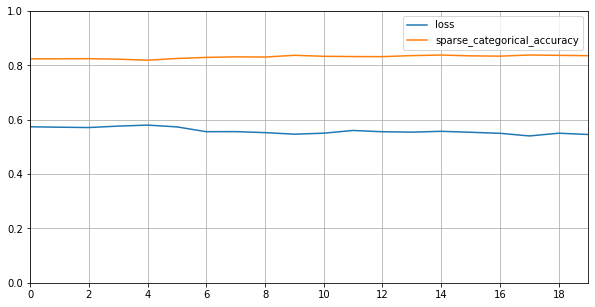

In [355]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> To evaluate the model, you use `evaluate()` method.

> <font color='red'>**Minimum Accuracy Requirement**</font>: Your accuracy on `test_batch` must be at least **0.70**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_clf` accordingly.

In [356]:
# Evaluate the model on test_batch - no need to pass y_test because it's included in test_batch
cross_entropy_loss, accuracy = nn_clf.evaluate(test_batch)

137/137 [==============================] - 0s 598us/step - loss: 0.9128 - sparse_categorical_accuracy: 0.7048


In [357]:
# Minimum Required Accuracy: 0.70
round(accuracy, 2)

0.7

In [358]:
y_pred = nn_clf.predict_classes(X_test)

In [359]:
y_pred

array([3, 2, 0, ..., 0, 3, 0], dtype=int64)

> Get a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [362]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       432
           1       0.62      0.32      0.42       179
           2       0.69      0.71      0.70       486
           3       0.73      0.71      0.72       267
           6       0.00      0.00      0.00         1

    accuracy                           0.70      1365
   macro avg       0.55      0.52      0.53      1365
weighted avg       0.70      0.70      0.69      1365



> Next, you're going to fine-tune your learning-rate specifically. To do so and to avoid repeating the code, let's write a function.

In [363]:
def build_model():
    nn_clf = tf.keras.Sequential([
        # Add layers accordingly
        layers.Dense(7,input_dim=X_train.shape[1], activation="relu", name="layer1"),
        layers.Dense(14,activation="softmax", name="layer2"),
        layers.Dense(21,activation="softmax", name="layer3"),
        ])  
    return nn_clf

> The learning rate range that you're going to investigate is between 0.001 and 0.1 with an increment step of 0.001. Use the optimizer of your choice that performed the best in your fine-tuning, and don't change it in the `for` loop.

> It's possible to try different learning rate scheduling policies, including those policies with an exponential decay rate, but you narrow down your investigation on this specific range for this part of the assignment.

> Running this cell may take a few minutes!

In [366]:
accuracies = []
learning_rates = np.arange(0.001, 0.011, 0.001)

for i in learning_rates:
    nn_clf = build_model()
    opt = keras.optimizers.Adam(learning_rate=i)
    nn_clf.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])
    nn_clf_history = nn_clf.fit(train_batch,epochs=20)
    cross_entropy_loss, accuracy = nn_clf.evaluate(test_batch)
    accuracies.append(round(accuracy, 2))  
    
''' Write a for loop that iterates over learning_rate
    In each iteration:
        build a new model by calling build_model(),
        compile with the optimizer of your choice and the current learning_rate,
        train on train_batch with 20 epochs,
        evaluate on test_batch and get the accuracy,
        append accuracy to accuracies
'''
for lr in learning_rates: #lr is current learning rate
    print("lr = ",lr)

for a in accuracies:
    print("accuracy = ", a)

Train for 546 steps
Epoch 1/20
546/546 [==============================] - 1s 1ms/step - loss: 2.2608 - sparse_categorical_accuracy: 0.3824
Epoch 2/20
546/546 [==============================] - 1s 959us/step - loss: 1.5248 - sparse_categorical_accuracy: 0.4751
Epoch 3/20
546/546 [==============================] - 0s 873us/step - loss: 1.2703 - sparse_categorical_accuracy: 0.5278
Epoch 4/20
546/546 [==============================] - 0s 849us/step - loss: 1.1362 - sparse_categorical_accuracy: 0.5401
Epoch 5/20
546/546 [==============================] - 1s 921us/step - loss: 1.0527 - sparse_categorical_accuracy: 0.5531
Epoch 6/20
546/546 [==============================] - 0s 863us/step - loss: 1.0006 - sparse_categorical_accuracy: 0.5403
Epoch 7/20
546/546 [==============================] - 0s 887us/step - loss: 0.9638 - sparse_categorical_accuracy: 0.5495
Epoch 8/20
546/546 [==============================] - 0s 898us/step - loss: 0.9399 - sparse_categorical_accuracy: 0.5509
Epoch 9/20
546

546/546 [==============================] - 1s 923us/step - loss: 0.8168 - sparse_categorical_accuracy: 0.6918
Epoch 10/20
546/546 [==============================] - 0s 879us/step - loss: 0.7742 - sparse_categorical_accuracy: 0.7110
Epoch 11/20
546/546 [==============================] - 0s 865us/step - loss: 0.7460 - sparse_categorical_accuracy: 0.7288
Epoch 12/20
546/546 [==============================] - 0s 834us/step - loss: 0.7277 - sparse_categorical_accuracy: 0.7357
Epoch 13/20
546/546 [==============================] - 0s 878us/step - loss: 0.7007 - sparse_categorical_accuracy: 0.7511
Epoch 14/20
546/546 [==============================] - 0s 897us/step - loss: 0.6751 - sparse_categorical_accuracy: 0.7604
Epoch 15/20
546/546 [==============================] - 0s 871us/step - loss: 0.6497 - sparse_categorical_accuracy: 0.7742
Epoch 16/20
546/546 [==============================] - 0s 871us/step - loss: 0.6546 - sparse_categorical_accuracy: 0.7756
Epoch 17/20
546/546 [===============

Text(0, 0.5, 'Accuracies')

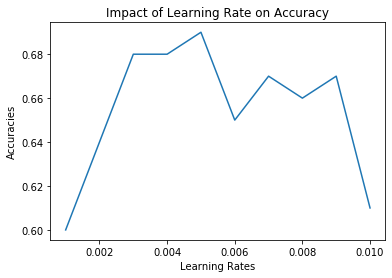

In [370]:
# Plot the "Impact of Learning Rate on Accuracy" with learning_rates on x-axis and accuracies on y_axis
# Plot must have title and axis labels. Incomplete plots will get NO CREDIT!
plt.plot(learning_rates, accuracies)
plt.title('Impact of Learning Rate on Accuracy')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracies')

## Part I - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

**Q1 [5 points]** - According to your learning rate fine-tuning plot, what is a good value for learning rate?
<br> 0.005 was the best according to the plot <br> 
**Q2 [5 points]** - If you change the batch size in `train_batch` and `test_batch`:

(a - 2 points) would it increase or decrease the speed of training? Also, would it increase or decrease the accuracy? YOU MUST DO EXPERIMENTS and report whether training speed and accuracy increase or decrease by changing batch size.
<br>The smaller the batch sizes, the faster the training and also generalizes the data better compared to larger sizes. <br>
<br>(b - 3 points) Explain why those observations on training speed and accuracy happen. <br>
The smaller the data set means there is less data to train, thus the time to train decreases. When the data set increases in size, the more error could happen, and it is harder to generalize the more data you have. So accuracy is also going to decrease.

**Q3 [5 points]** - Name five learning rate scheduling policies known as **learning schedules** (you may consult with the textbook), and explain each briefly in no more than two sentences.
<br> Performance scheduling: Measure the validation error every N steps and reduce the learning rate by a factor of lamba when the error stops dropping.<br>
<br> Piecewise constant scheduling: Uss a constant learning rate for a number of epons then a smaller learning rate for another number of epochs<br>
<br> Time-based: learning schedules alter the learning rate dependoning on the learning rate of the previous time iteration<br>
<br> Step-based: learning schedule changes the learning rate according to some pre defined steps <br>
<br> Exponential: learning schedule are similar to step-based but insread of steps a decreasing exponetial is used<br>

## Part II - Regression Using NNs

In Part II, you're going to perform regression using NNs.

You're going to predict `NA_Sales` based on other sales in the world. It is possible to frame the regression problem with other values as target, but this is how you're going to do regression practice for Part II. Notice that you should already drop `Global_Sales` from your game_data.

## <font color="red"> Required Coding

In [418]:
# Get feature vector X_reg (all columns but "NA_Sales") and target label y_reg as "NA_Sales"
X_reg = game_data.loc[:,game_data.columns != 'NA_Sales']
y_reg = game_data['NA_Sales']

In [419]:
# Print X_reg shape and head
print(X_reg.shape)
X_reg.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [420]:
# Using pandas.get_dummies() create dummy variables for categorical features
X_reg = pd.get_dummies(X_reg)
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,28.96,3.77,8.45,76.0,51.0,322.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2008.0,12.76,3.79,3.29,82.0,73.0,709.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,10.93,3.28,2.95,80.0,73.0,192.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2006.0,9.14,6.50,2.88,89.0,65.0,431.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,2006.0,9.18,2.93,2.84,58.0,41.0,129.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [421]:
# Normalize X_reg using mean() and std()  NOTE: The output is provided for your reference.
mean = np.mean(X_reg)
std = np.std(X_reg)
X_reg -= mean
X_reg /= std
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,-0.341201,41.793631,12.887711,31.007176,0.413044,1.148059,0.250734,-0.152441,-0.045338,-0.270082,...,-0.012105,-0.017121,-0.012105,-0.012105,1.509337,-0.397191,-0.012105,-0.515523,-0.012105,-0.731025
2,0.133752,18.222438,12.957265,11.885525,0.845709,2.292536,0.909586,-0.152441,-0.045338,-0.270082,...,-0.012105,-0.017121,-0.012105,-0.012105,1.509337,-0.397191,-0.012105,-0.515523,-0.012105,-0.731025
3,0.371229,15.559767,11.183651,10.625572,0.701487,2.292536,0.029415,-0.152441,-0.045338,-0.270082,...,-0.012105,-0.017121,-0.012105,-0.012105,1.509337,-0.397191,-0.012105,-0.515523,-0.012105,-0.731025
6,-0.341201,12.955296,22.381762,10.366169,1.350484,1.876363,0.436302,-0.152441,-0.045338,3.702574,...,-0.012105,-0.017121,-0.012105,-0.012105,1.509337,-0.397191,-0.012105,-0.515523,-0.012105,-0.731025
7,-0.341201,13.013496,9.966465,10.217939,-0.884950,0.627843,-0.077840,-0.152441,-0.045338,-0.270082,...,-0.012105,-0.017121,-0.012105,-0.012105,1.509337,-0.397191,-0.012105,-0.515523,-0.012105,-0.731025


In [422]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg,train_size=.80,test_size=.2)

print(X_reg_train.shape)
print(y_reg_train.shape)
print(X_reg_test.shape)
print(y_reg_test.shape)

(5460, 1683)
(5460,)
(1365, 1683)
(1365,)


In [434]:
# Batch the data
train_tensor_reg = tf.data.Dataset.from_tensor_slices((X_reg_train.values, y_reg_train.values))
test_tensor_reg = tf.data.Dataset.from_tensor_slices((X_reg_test.values, y_reg_test.values))
train_batch_reg = train_tensor_reg.shuffle(len(X_reg_train)).batch(10)
test_batch_reg = test_tensor_reg.shuffle(len(X_reg_test)).batch(10)



In [435]:
train_tensor_reg.element_spec

(TensorSpec(shape=(1683,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None))

### Building NN for Regression

In [436]:
# Build a sequential NN with appropriate layers for regression
# Use ReLU for all hidden layers

# Hint1: input_dim of the first layer should match with the number of features in X_train_reg
# Hint2: Notice that the activation function and number of neurons in the output layer are determined
# by the type of ML task i.e. Regression

nn_reg = tf.keras.Sequential([
    # Add layers accordingly
    layers.Dense(1683,input_dim=X_reg_train.shape[1], activation="relu", name="layer1"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="relu")
    ]) 

In [437]:
nn_reg.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1683)              2834172   
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 3368      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 2,837,543
Trainable params: 2,837,543
Non-trainable params: 0
_________________________________________________________________


In [438]:
# Compile nn_reg with appropriate loss and metric

# Hint1: You need to choose the loss and metric for regression
# Hint2: For this regression task, loss and metrics might be the same
reg_opt = keras.optimizers.RMSprop(learning_rate=0.001)
nn_reg.compile(loss='mse',optimizer=reg_opt,metrics=['mse'])

In [439]:
# Fit the network on train_batch_reg with 20 epochs
nn_reg_history = nn_reg.fit(train_batch_reg,epochs=20)

Train for 546 steps
Epoch 1/20
546/546 [==============================] - 9s 16ms/step - loss: 0.4352 - mse: 0.4352
Epoch 2/20
546/546 [==============================] - 10s 17ms/step - loss: 0.2973 - mse: 0.2973
Epoch 3/20
546/546 [==============================] - 10s 18ms/step - loss: 0.2265 - mse: 0.2265
Epoch 4/20
546/546 [==============================] - 9s 17ms/step - loss: 0.1778 - mse: 0.1778
Epoch 5/20
546/546 [==============================] - 9s 16ms/step - loss: 0.1506 - mse: 0.1506
Epoch 6/20
546/546 [==============================] - 10s 19ms/step - loss: 0.1601 - mse: 0.1601
Epoch 7/20
546/546 [==============================] - 9s 16ms/step - loss: 0.1227 - mse: 0.1227
Epoch 8/20
546/546 [==============================] - 9s 16ms/step - loss: 0.1267 - mse: 0.1267: 1s - loss: 0.12
Epoch 9/20
546/546 [==============================] - 9s 16ms/step - loss: 0.1011 - mse: 0.1011
Epoch 10/20
546/546 [==============================] - 9s 16ms/step - loss: 0.0990 - mse: 0.0990

(0, 1)

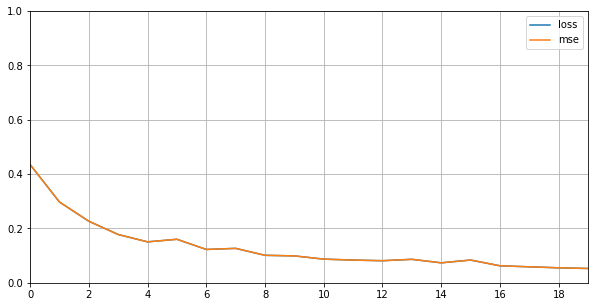

In [440]:
pd.DataFrame(nn_reg_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> <font color='red'>**Maximum Acceptable Loss Requirement**</font>: Your loss on `test_batch_reg` should not exceed **0.15**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_reg` accordingly.

In [441]:
# Evaluate the model on test_batch_reg
loss, metric = nn_reg.evaluate(test_batch_reg)

137/137 [==============================] - 0s 2ms/step - loss: 0.1368 - mse: 0.1373


In [442]:
# Maximum acceptable loss: 0.15
round(loss, 2)

0.14

> Next, you're going to build another NN and use callback and early stopping to determine the optimal number of epochs.

In [446]:
# Build a sequential NN with appropriate layers for regression
# Use ReLU for all hidden layers

# Hint1: input_dim of the first layer should match with the number of features in X_train_reg
# Hint2: Notice that the activation function and number of neurons in the output layer are determined
# by the type of ML task i.e. Regression

nn_reg2 = tf.keras.Sequential([
    # Add layers accordingly
    layers.Dense(1683,input_dim=X_reg_train.shape[1], activation="relu", name="layer1"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="relu")
    ]) 

In [447]:
# Create an optimizer of your choice with a learning rate of 0.001
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

> Next, you're going to create `callbacks` and `EarlyStopping`.

> **Note:** The `patience` parameter is the number of epochs to monitor for improvement. You may want to look up textbook examples to learn how to do this, but notice that there is no validation data here.

In [448]:
# Create a tf.keras.callbacks with EarlyStopping method and monitor='loss' and patience=10 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [449]:
# Compile nn_reg2 with appropriate loss, optimizer=optimizer and TWO metrics for regression
# Hint: The two metrics must be both for regression, and one of them may be the same as loss
nn_reg2.compile(loss='mse',optimizer=optimizer,metrics=['mse','mae'])

> Now run the training, sit back and let tf/keras determine the optimal number of epochs!

In [451]:
EPOCHS = 1000
# Fit nn_reg2 on train_batch_reg, epochs=EPOCHS, callbacks=[early_stop]
nn_reg2_history = nn_reg2.fit(train_batch_reg, epochs=EPOCHS, callbacks=[early_stop])

Train for 546 steps
Epoch 1/1000
546/546 [==============================] - 9s 16ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 2/1000
546/546 [==============================] - 10s 17ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 3/1000
546/546 [==============================] - 8s 15ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 4/1000
546/546 [==============================] - 8s 15ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 5/1000
546/546 [==============================] - 9s 16ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 6/1000
546/546 [==============================] - 8s 14ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 7/1000
546/546 [==============================] - 8s 14ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 8/1000
546/546 [==============================] - 8s 14ms/step - loss: 1.1662 - mse: 1.1662 - mae: 0.3988
Epoch 9/1000
546/546 [==============================] - 8s 14ms/step - loss: 1.1662

(0, 6)

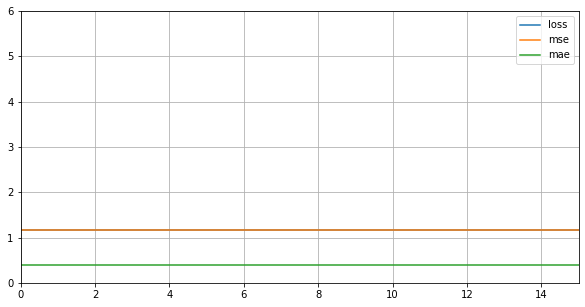

In [452]:
pd.DataFrame(nn_reg2_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 6) 

## Part II - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

**Q1 [5 points]** <br>
(a - 3 points) - Using eraly stopping and callbacks, how may epochs did the training run for `nn_reg2`? Find the attribute in history object that logs number of epochs. Write the code to get number of epochs in the following cell.

(b - 2 points) - How did the training stop? Your answer should exactly mention the criteria for when the training stops. EXPLAIN CLEARLY AND COMPLETELY IN NO MORE THAN TWO SENTENCES!
<br> The training stop as the loss was not changing, it reached a local minimum thus early stopping occoured <br>

In [460]:
# Get number of epochs from history object (Hint: it would return a list)
print(len(nn_reg2_history.history['loss']))

16


**Q2 [5 points]** - On the history plot of `nn_reg2`, you have three colors/curves, but only two of them are displayed. Explain why?
At least for my case, loss and mse is the same thing, so that may be one reason. Another reason that loss it not being graphed is that it may not changing so it. 

## Grading

Assignment-4 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I Classification on Rating: [total 70 points]
    - Implementation of nn_clf: 40 points - **Minimum Required Accuracy**: 0.70 otherwise ZERO CREDIT!
    - Learning rate fine-tuning plot: 15 points
    - Questions: 15 points (5 points each)


- Part II Regression on NA_Sales: [total 30 points]
    - Implementation of nn_reg: 10 points - **Maximum Acceptable Loss**: 0.15 otherwise ZERO CREDIT!
    - Early stopping of nn_reg_2: 10 points
    - Questions: 10 points (5 points each)
   

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A4.ipynb```. Submit the completed notebook using the ```Assignment-4``` link on Blackboard.

Grading will be based on 

  * correct implementation and results, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday November 23rd, 11:59PM.</b></font>